In [43]:
language = 'ja'
import name_transliteration.filtering as filter
import name_transliteration.cleansing as cleanse
import name_transliteration.model_trainer_and_tester as model_trainer_and_tester

In [44]:
# filter testing and training data
my_filter = filter.Filter(language)
my_filter.filterData("./data/")

# split filtered data into two sets
filtered_set_A = my_filter.getDataFrame().iloc[:int(len(my_filter.getDataFrame())/2)]
filtered_set_B = my_filter.getDataFrame().iloc[int(len(my_filter.getDataFrame())/2):]

./data/stream-2021-03-07T03:05:07.831679.gz
./data/stream-2021-01-13T01:21:29.804195.gz
./data/stream-2021-01-13T04:07:46.253913.gz
./data/stream-2021-01-12T23:08:30.828340.gz
./data/stream-2021-01-13T03:38:20.383129.gz
./data/stream-2021-03-07T06:30:03.830030.gz
./data/stream-2021-01-13T04:37:35.200990.gz
./data/stream-2021-03-07T03:34:53.811604.gz
./data/stream-2021-04-17T07:23:41.809159.gz
./data/stream-2021-01-12T22:39:33.810384.gz
./data/stream-2021-03-06T03:25:42.946878.gz
./data/stream-2021-01-12T22:09:26.798946.gz
./data/stream-2021-03-07T04:06:04.938654.gz
./data/stream-2021-03-07T01:39:45.126113.gz
./data/stream-2021-03-07T08:30:55.833881.gz
./data/stream-2021-03-07T02:36:22.842559.gz
./data/stream-2021-03-06T01:33:50.975776.gz
./data/stream-2021-03-06T01:59:57.825571.gz
./data/stream-2021-03-07T07:50:03.791977.gz
./data/stream-2021-04-17T04:49:34.818794.gz
./data/stream-2021-03-06T00:38:21.058969.gz
./data/stream-2021-03-07T01:29:37.938029.gz
./data/stream-2021-01-13T00:02:2

In [46]:
# instantiate the cleanser
my_cleanser = cleanse.Cleanser()

# perform pre-processing on set B and save
filtered_set_B["username"] = filtered_set_B["username"].apply(my_cleanser.transformUserName)
filtered_set_B = filtered_set_B[['username','screen_name']]
filtered_set_B.to_csv('filtered_set_B.txt', header=None, index=None, sep='\t', mode='w')

In [6]:
# define variables

edit_threshold = 0.3
edit_string = str(int(edit_threshold*100))
model_name = 'model_1'

In [5]:

# the split data is uncleansed btw
my_cleanser.splitTrainTest(filtered_set_A)

# this does the cleansing of the test datasets
my_cleanser.createTestDataSets()
# this does the cleansing of the training dataset
my_cleanser.createTrainDataSet(edit_threshold = edit_threshold)
# save cleansed test and train files
my_cleanser.saveTestAndTrain()

Saved cleansed names as: 
train_30_edit_distance_language_cleansed.txt 29606 number of rows. 
test1_cleansed.txt 174 number of rows. 
test2_cleansed.txt 234 number of rows. 
test3_cleansed.txt 481 number of rows. 



In [9]:
# train model and save model 1
model_1 = model_trainer_and_tester.ModelTrainerAndTester(
    language=language, 
    epochs=10
)
model_1.determineDimensions(['train_'+edit_string+'_edit_distance_language_cleansed.txt', 'test1_cleansed.txt', 'test2_cleansed.txt', 'test3_cleansed.txt', 'filtered_set_B.txt'])
train_encode_input, train_decode_input, train_decode_output = model_1.processData('train_'+edit_string+'_edit_distance_language_cleansed.txt')
model_1.buildModel()
model_1.trainModel(model_name, train_encode_input, train_decode_input, train_decode_output)
model_1.createDecoderEncoder(model_name)

Number of unique input tokens: 27
Number of unique output tokens: 5071
Max sequence length for inputs: 22
Max sequence length for outputs: 52
Epoch 1/10
741/741 [==============================] - 632s 847ms/step - loss: 0.7832 - accuracy: 0.9050 - val_loss: 0.4146 - val_accuracy: 0.9264
Epoch 2/10
741/741 [==============================] - 592s 798ms/step - loss: 0.3871 - accuracy: 0.9294 - val_loss: 0.3560 - val_accuracy: 0.9328
Epoch 3/10
741/741 [==============================] - 570s 769ms/step - loss: 0.3365 - accuracy: 0.9360 - val_loss: 0.3124 - val_accuracy: 0.9405
Epoch 4/10
741/741 [==============================] - 566s 764ms/step - loss: 0.2965 - accuracy: 0.9434 - val_loss: 0.2826 - val_accuracy: 0.9459
Epoch 5/10
741/741 [==============================] - 561s 756ms/step - loss: 0.2638 - accuracy: 0.9498 - val_loss: 0.2630 - val_accuracy: 0.9510
Epoch 6/10
741/741 [==============================] - 555s 749ms/step - loss: 0.2398 - accuracy: 0.9546 - val_loss: 0.2397 - val

INFO:tensorflow:Assets written to: model_1/assets


In [3]:
model_1.evaluateOnTestData(model_name)

NameError: name 'model_1' is not defined

# Reloading model A since it has already been trained on previous runs

In [1]:
language = 'ja'
import name_transliteration.model_trainer_and_tester as model_trainer_and_tester
import numpy as np
import matplotlib.pyplot as plt

loaded_model = model_trainer_and_tester.ModelTrainerAndTester(
    language=language
)
loaded_model.loadDataParameters()
loaded_model.createDecoderEncoder('model_1')

In [7]:
loaded_model.evaluateOnTestData('model_1')


evaluating on test set with 0 edit threshold...
6/6 [==============================] - 2s 200ms/step - loss: 0.1226 - accuracy: 0.9778
test loss, test acc: [0.12262900918722153, 0.9777851700782776]
evaluating on test set with 0.1 edit threshold...
8/8 [==============================] - 2s 212ms/step - loss: 0.1642 - accuracy: 0.9707
test loss, test acc: [0.16416938602924347, 0.9706607460975647]
evaluating on test set with 0.25 edit threshold...
16/16 [==============================] - 4s 248ms/step - loss: 0.2031 - accuracy: 0.9621
test loss, test acc: [0.20310865342617035, 0.9621381759643555]


In [2]:
# the create_probabilities() method is reall memory intensive
# it crashes when trying to predict files with over 20,000 rows
# to solve this issue, we are going to split a large file into multiple ones each with only 20,000 rows

lines_per_file = 20000
smallfile = None
total_lines = 0
with open('filtered_set_B.txt') as bigfile:
    for line_number, line in enumerate(bigfile):
        if line_number % lines_per_file == 0:
            if smallfile:
                smallfile.close()
            small_filename = 'filtered_set_B_{}.txt'.format(int(line_number/lines_per_file))
            smallfile = open(small_filename, "w")
        smallfile.write(line)
        total_lines = total_lines + 1
    if smallfile:
        smallfile.close()

In [3]:
total_runs = int(total_lines/20000)+1

In [4]:
def return_prob_list(run_number):
    loaded_model = model_trainer_and_tester.ModelTrainerAndTester(
        language=language
    )
    loaded_model.loadDataParameters()
    loaded_model.createDecoderEncoder('model_1')
    prob_list = loaded_model.create_probabilities("filtered_set_B_{}.txt".format(run_number))
    del loaded_model
    return prob_list

In [5]:
big_prob_list = []
for i in range(total_runs):
    prob_list = return_prob_list(i)
    big_prob_list.extend(prob_list)
    del prob_list

data is processed
completed prediction iteration: 1 of 21
completed prediction iteration: 2 of 21
completed prediction iteration: 3 of 21
completed prediction iteration: 4 of 21
completed prediction iteration: 5 of 21
completed prediction iteration: 6 of 21
completed prediction iteration: 7 of 21
completed prediction iteration: 8 of 21
completed prediction iteration: 9 of 21
completed prediction iteration: 10 of 21
completed prediction iteration: 11 of 21
completed prediction iteration: 12 of 21
completed prediction iteration: 13 of 21
completed prediction iteration: 14 of 21
completed prediction iteration: 15 of 21
completed prediction iteration: 16 of 21
completed prediction iteration: 17 of 21
completed prediction iteration: 18 of 21
completed prediction iteration: 19 of 21
completed prediction iteration: 20 of 21
20000 predictions completed
data is processed
completed prediction iteration: 1 of 21
completed prediction iteration: 2 of 21
completed prediction iteration: 3 of 21
compl

completed prediction iteration: 13 of 21
completed prediction iteration: 14 of 21
completed prediction iteration: 15 of 21
completed prediction iteration: 16 of 21
completed prediction iteration: 17 of 21
completed prediction iteration: 18 of 21
completed prediction iteration: 19 of 21
completed prediction iteration: 20 of 21
20000 predictions completed
data is processed
completed prediction iteration: 1 of 21
completed prediction iteration: 2 of 21
completed prediction iteration: 3 of 21
completed prediction iteration: 4 of 21
completed prediction iteration: 5 of 21
completed prediction iteration: 6 of 21
completed prediction iteration: 7 of 21
completed prediction iteration: 8 of 21
completed prediction iteration: 9 of 21
completed prediction iteration: 10 of 21
completed prediction iteration: 11 of 21
completed prediction iteration: 12 of 21
completed prediction iteration: 13 of 21
completed prediction iteration: 14 of 21
completed prediction iteration: 15 of 21
completed prediction

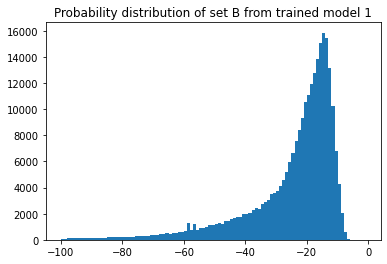

In [27]:
plt.hist(np.array(big_prob_list), bins=np.arange(100)-100)
plt.title('Probability distribution of set B from trained model 1')
plt.show()

In [28]:
np.arange(30)-30

array([-30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18,
       -17, -16, -15, -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,
        -4,  -3,  -2,  -1])

In [25]:
min(big_prob_list)

-310.2437228265469

In [42]:
# save the probabability list to disk, takes a long time to generate
with open('set_B_prob_list_logged.txt', 'w') as f:
    for item in big_prob_list:
        f.write("%s\n" % item)

In [39]:
probability_threshold = -13
drop_list = []
for i, prob in enumerate(big_prob_list):
    if prob <= probability_threshold:
        drop_list.append(i)

In [40]:
len(big_prob_list)-len(drop_list)

37164

In [49]:
len(big_prob_list)

265298

In [51]:
filtered_set_B.reset_index(inplace=True)

In [52]:
cleansed_set_B = filtered_set_B.drop(drop_list)

In [57]:
cleansed_set_B = cleansed_set_B[['username','screen_name']]

In [58]:
cleansed_set_B.to_csv('cleansed_set_B_logged.txt', header=None, index=None, sep='\t', mode='w')

In [59]:
# training model B
model_B = model_trainer_and_tester.ModelTrainerAndTester(
    language=language, 
    epochs=10
)
model_B.loadDataParameters()
train_encode_input, train_decode_input, train_decode_output = model_B.processData('cleansed_set_B_logged.txt')
model_B.buildModel()
model_B.trainModel('model_2', train_encode_input, train_decode_input, train_decode_output)
model_B.createDecoderEncoder('model_2')

Epoch 1/10
 13/930 [..............................] - ETA: 10:17 - loss: 5.4666 - accuracy: 0.7089

KeyboardInterrupt: 

In [33]:
model_B.evaluateOnTestData('model_2')


evaluating on test set with 0 edit threshold...
6/6 [==============================] - 2s 205ms/step - loss: 0.5122 - accuracy: 0.9327
test loss, test acc: [0.5122091174125671, 0.932692289352417]
evaluating on test set with 0.1 edit threshold...
8/8 [==============================] - 2s 202ms/step - loss: 0.5988 - accuracy: 0.9265
test loss, test acc: [0.5987810492515564, 0.9265285730361938]
evaluating on test set with 0.25 edit threshold...
16/16 [==============================] - 4s 218ms/step - loss: 0.6903 - accuracy: 0.9210
test loss, test acc: [0.6903167963027954, 0.9209979176521301]


In [2]:
prob_list = []

loaded_model.create_probabilities("filtered_set_B_small.txt")

data is processed
completed prediction iteration: 1 of 21
completed prediction iteration: 2 of 21
completed prediction iteration: 3 of 21
completed prediction iteration: 4 of 21
completed prediction iteration: 5 of 21
completed prediction iteration: 6 of 21
completed prediction iteration: 7 of 21
completed prediction iteration: 8 of 21
completed prediction iteration: 9 of 21
completed prediction iteration: 10 of 21
completed prediction iteration: 11 of 21
completed prediction iteration: 12 of 21
completed prediction iteration: 13 of 21
completed prediction iteration: 14 of 21
completed prediction iteration: 15 of 21
completed prediction iteration: 16 of 21
completed prediction iteration: 17 of 21
completed prediction iteration: 18 of 21
completed prediction iteration: 19 of 21
completed prediction iteration: 20 of 21
20000 predictions completed
CPU times: user 10min 48s, sys: 2min 45s, total: 13min 34s
Wall time: 3min 30s


In [7]:
import pandas as pd
filtered_set_B_small = pd.read_csv("filtered_set_B_small.txt", sep='\t', header=None)

In [25]:
probability_threshold = 0.75
drop_list = []
for i, prob in enumerate(prob_list):
    if prob <= probability_threshold:
        drop_list.append(i)

In [26]:
len(drop_list)

19968

In [27]:
cleansed_set_B_small = filtered_set_B_small.drop(drop_list)

In [28]:
cleansed_set_B_small.to_csv('cleansed_set_B_small.txt', header=None, index=None, sep='\t', mode='w')

In [29]:
# training model B
model_B = model_trainer_and_tester.ModelTrainerAndTester(
    language=language, 
    epochs=10
)
model_B.loadDataParameters()
train_encode_input, train_decode_input, train_decode_output = model_B.processData('cleansed_set_B_small.txt')
model_B.buildModel()
model_B.trainModel('model_B', train_encode_input, train_decode_input, train_decode_output)
model_B.createDecoderEncoder('model_B')

Epoch 1/10
1/1 [==============================] - 5s 5s/step - loss: 8.5300 - accuracy: 0.0000e+00 - val_loss: 8.4246 - val_accuracy: 0.9478
Epoch 2/10
1/1 [==============================] - 1s 843ms/step - loss: 8.4261 - accuracy: 0.9362 - val_loss: 7.2243 - val_accuracy: 0.9478
Epoch 3/10
1/1 [==============================] - 1s 752ms/step - loss: 7.2259 - accuracy: 0.9362 - val_loss: 4.7276 - val_accuracy: 0.9478
Epoch 4/10
1/1 [==============================] - 1s 1s/step - loss: 4.7397 - accuracy: 0.9362 - val_loss: 3.0267 - val_accuracy: 0.9478
Epoch 5/10
1/1 [==============================] - 1s 814ms/step - loss: 3.0447 - accuracy: 0.9362 - val_loss: 1.7828 - val_accuracy: 0.9478
Epoch 6/10
1/1 [==============================] - 1s 790ms/step - loss: 1.8037 - accuracy: 0.9362 - val_loss: 1.0615 - val_accuracy: 0.9478
Epoch 7/10
1/1 [==============================] - 1s 751ms/step - loss: 1.0894 - accuracy: 0.9362 - val_loss: 0.7252 - val_accuracy: 0.9478
Epoch 8/10
1/1 [======

INFO:tensorflow:Assets written to: model_B/assets


INFO:tensorflow:Assets written to: model_B/assets


In [30]:
model_B.evaluateOnTestData('model_B')


evaluating on test set with 0 edit threshold...
6/6 [==============================] - 2s 211ms/step - loss: 0.6919 - accuracy: 0.9164
test loss, test acc: [0.6918842792510986, 0.9164456129074097]
evaluating on test set with 0.1 edit threshold...
8/8 [==============================] - 2s 213ms/step - loss: 0.7414 - accuracy: 0.9113
test loss, test acc: [0.7413906455039978, 0.9113247990608215]
evaluating on test set with 0.25 edit threshold...
16/16 [==============================] - 4s 237ms/step - loss: 0.7879 - accuracy: 0.9071
test loss, test acc: [0.7879423499107361, 0.9071245789527893]


In [10]:
prob_list = trainer_and_tester.create_probabilities('small_names.txt')

finished predictions!


In [17]:
import numpy as np
def create_probabilities(data_path):
    test_encoder_input, test_decoder_input, test_decoder_output = trainer_and_tester.processData(data_path)
    prediction = trainer_and_tester.model.predict([test_encoder_input, test_decoder_input])
    print("finished predictions!")

    # prediction is a three dimensional numpy array
    # first dimension relatees to which row of the original data
    # second dimension is the sequence dimension, length will be the max decoder length
    # third dimension is a probability distribution, length will be the number of target tokens
    prob_list = []
    for row in prediction:
        for time_step in row:
            highest_prob_idx = np.argmax(time_step[:])
            if trainer_and_tester.reverse_target_char_index[highest_prob_idx] == '\n':
                prob = max(time_step[:])
                prob_list.append(prob)
                break
    return prob_list

In [23]:
prob_list = create_probabilities('small_names.txt')

finished predictions!


In [24]:
prob_list

[0.17142753,
 0.05898299,
 0.27404648,
 0.24443997,
 0.8746748,
 0.08803612,
 0.59971315,
 0.15099098,
 0.36538252,
 0.29847044,
 0.020500638,
 0.39464876,
 0.092565365,
 0.19886206,
 0.08433535,
 0.3660765,
 0.40596545,
 0.037862115,
 0.09895991,
 0.5024829,
 0.12542808]

In [27]:
trainer_and_tester.predict('amaimono no')

('まままま\n', 0.24569076)

In [11]:
trainer_and_tester.reverse_target_char_index[6]

'\n'

In [15]:
# train model 2 and save model 2
trainer_and_tester2 = model_trainer_and_tester.ModelTrainerAndTester(
    language=language, 
    epochs=20
)
# trainer_and_tester2.determineDimensions(['train_10_edit_distance_language_cleansed.txt', 'test1_cleansed.txt', 'test2_cleansed.txt', 'test3_cleansed.txt', 'filtered_set_B.txt','model_cleansed_names.txt'])
# train_encode_input, train_decode_input, train_decode_output = trainer_and_tester2.processData('model_cleansed_names.txt')
# trainer_and_tester2.buildModel()
# trainer_and_tester2.trainModel(language + '_model_'+str(20)+'_v2', train_encode_input, train_decode_input, train_decode_output)
# trainer_and_tester2.createDecoderEncoder(language + '_model_'+str(20)+'_v2')

trainer_and_tester2.runWholeTrainProcess('model_cleansed_names.txt', 'model_20_v2')

Number of unique input tokens: 27
Number of unique output tokens: 937
Max sequence length for inputs: 19
Max sequence length for outputs: 43
Epoch 1/20
21/21 [==============================] - 6s 182ms/step - loss: 3.2954 - accuracy: 0.7149 - val_loss: 0.8984 - val_accuracy: 0.8613
Epoch 2/20
21/21 [==============================] - 3s 149ms/step - loss: 0.9094 - accuracy: 0.8595 - val_loss: 0.8778 - val_accuracy: 0.8625
Epoch 3/20
21/21 [==============================] - 4s 169ms/step - loss: 0.8777 - accuracy: 0.8636 - val_loss: 0.9020 - val_accuracy: 0.8635
Epoch 4/20
21/21 [==============================] - 3s 165ms/step - loss: 0.8133 - accuracy: 0.8684 - val_loss: 0.8771 - val_accuracy: 0.8633
Epoch 5/20
21/21 [==============================] - 4s 191ms/step - loss: 0.8245 - accuracy: 0.8665 - val_loss: 0.8873 - val_accuracy: 0.8640
Epoch 6/20
21/21 [==============================] - 3s 166ms/step - loss: 0.8412 - accuracy: 0.8631 - val_loss: 0.8771 - val_accuracy: 0.8633
Epoch 7

INFO:tensorflow:Assets written to: ja_model_20_v2/assets


In [16]:
trainer_and_tester2.evaluateOnTestData('model_'+str(20)+'_v2')


evaluating on test set with 0 edit threshold...
5/5 [==============================] - 1s 51ms/step - loss: 0.4885 - accuracy: 0.9236
test loss, test acc: [0.4885435402393341, 0.9235658645629883]
evaluating on test set with 0.1 edit threshold...
7/7 [==============================] - 0s 57ms/step - loss: 0.5423 - accuracy: 0.9160
test loss, test acc: [0.5423395037651062, 0.91595458984375]
evaluating on test set with 0.25 edit threshold...
14/14 [==============================] - 1s 52ms/step - loss: 0.5509 - accuracy: 0.9147
test loss, test acc: [0.5509322285652161, 0.9147106409072876]


In [17]:
print(trainer_and_tester.predict('reiwatomo'))
print(trainer_and_tester2.predict('reiwatomo'))

('あくち\n', 0.22617334)
('お\n', 0.0751004)


In [18]:
training_set_A = my_cleanser.training_dataframe

In [22]:
training_set_A

,index,username,screen_name,language
0,10,amaimono no,甘いもの,ja
1,33,animejikkyobot,アニメ実況,ja
2,42,tsudayan,つだやん,ja
3,47,ayu ko,鮎子,ja
4,63,mashiroharu,ましろはる,ja
...,...,...,...,...
2295,25766,future,ふつれ,ja
2296,25786,ri o,りお,ja
2297,25791,future,ふつれ,ja
2298,25804,paprikasan,パプリカ,ja


In [24]:
trainer_and_tester2.predict('zigo aku')

('お\n', 0.07910247)

In [21]:
training_set_A["conf"] = training_set_A["username"].apply(predict_confidence, args=(trainer_and_tester2,))

KeyboardInterrupt: 

In [19]:
test_encoder_input, test_decoder_input, test_decoder_output = loaded_model.processData('small_names.txt')

In [22]:
prediction = loaded_model.model.predict([test_encoder_input, test_decoder_input])

In [42]:
prediction[0,6,loaded_model.target_token_index['\n']]

1.0649676e-06

In [101]:
trainer_and_tester.predict("oharafumi")

('あくち\n', 0.16680214)

In [111]:
trainer_and_tester.reverse_target_char_index[0]

' '

In [113]:
prob_list = []
for i in range(len(prediction)):
    char_idx = np.argmax(prediction[i,0,:])
    print(char_idx)
#     j = 1
#     while char_idx != 0:
#         char_idx = np.argmax(prediction[i,j,:])
#         print(char_idx)
    

42
42
42
42
42
42
42


In [79]:
prediction[0,5,0]

0.9899092

In [64]:
prediction

array([[[8.3742070e-06, 1.4098549e-06, 6.5861754e-03, ...,
         1.3929487e-06, 1.3458267e-06, 1.3111600e-06],
        [3.7974369e-04, 8.7453395e-07, 1.7892161e-02, ...,
         9.0219305e-07, 9.1668733e-07, 8.6946778e-07],
        [2.0483108e-03, 5.9531010e-07, 1.1048008e-02, ...,
         6.6449655e-07, 6.2310545e-07, 5.8859285e-07],
        ...,
        [9.9999952e-01, 3.4604161e-13, 2.7603728e-10, ...,
         3.6542796e-13, 3.3970927e-13, 3.3975074e-13],
        [9.9999952e-01, 3.4598550e-13, 2.7601357e-10, ...,
         3.6530045e-13, 3.3962506e-13, 3.3969501e-13],
        [9.9999952e-01, 3.4592481e-13, 2.7598673e-10, ...,
         3.6517507e-13, 3.3954084e-13, 3.3963864e-13]],

       [[2.5005045e-03, 2.6287576e-06, 3.9306772e-03, ...,
         2.6972739e-06, 2.8987240e-06, 2.6490445e-06],
        [2.5983499e-02, 9.0083904e-07, 4.4184611e-03, ...,
         7.9166932e-07, 9.6195356e-07, 8.6236685e-07],
        [1.4645259e-01, 3.5979941e-08, 3.9797407e-04, ...,
         3.750

In [69]:
trainer_and_tester.model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, 27)]   0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None, 2972)] 0                                            
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 256), (None, 290816      input_1[0][0]                    
__________________________________________________________________________________________________
lstm_1 (LSTM)                   [(None, None, 256),  3306496     input_2[0][0]                    
                                                                 lstm[0][1]                   

In [ ]:
# also generate prediction and use edit distance to compare against